## Загрузка библиотек и исходных данных

In [1]:
pip install laspy                                                               # Инсталируем пакет по работе с облаком точек las

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for laspy: filename=laspy-2.4.1-py3-none-any.whl size=68063 sha256=e9d493ec7d2d033d078340a172e127b144300acfb9414833875e4d1b0ff743ef
  Stored in directory: /root/.cache/pip/wheels/b7/84/b9/28a55f13245e29f4bee5274790ace34180da34cf230679fcf3
Successfully built laspy


In [2]:
import time, random, gdown, os                                                  # Системные инструменты
import numpy as np                                                              # Работа с массивами

import laspy                                                                    # Библиотека для работы с точками las

import matplotlib.pyplot as plt                                                 # Отрисовка графиков
import seaborn as sns                                                           # Визуальные инструменты Seaborn
sns.set_style('darkgrid')
np.set_printoptions(suppress=True, linewidth=250)                               # Настройка печати Numpy

In [3]:
# Загрузка файла из облака на диск виртуальной машины colab
gdown.download('https://drive.google.com/uc?id=1nqY3MKkbz8-NzNy9NGPds4Z3yZ4m9tND', None, quiet=True)        # Путь к файлу pc_2021.las

'pc_2021.las'

In [4]:
filename = 'pc_2021.las'                                                        # las фафл
filefolder = '/content/'                                                        # путь к файлу 
las = laspy.read(f'{filefolder}{filename}')                                     # Считываем все данные из файла в память

## Анализ даных в файле

### формат las файла

In [5]:
#print(las.point_format)                                                        
print('Формат las файла:', las.point_format.id)

Формат las файла: 8


Подробнее о формате [las-файлов тут](https://laspy.readthedocs.io/en/latest/intro.html)

### имена измерений, включая дополнительные, если таковые есть

In [6]:
list(las.point_format.dimension_names)                                          

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'synthetic',
 'key_point',
 'withheld',
 'overlap',
 'scanner_channel',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'user_data',
 'scan_angle',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'nir']

### Получим максимальные и минимальные координаты точек x, y, z из заголовка файла

In [7]:
las.header.maxs[0], las.header.mins[0], las.header.maxs[1], las.header.mins[1], las.header.maxs[2], las.header.mins[2]

(691999.99, 691000.0, 6468999.99, 6468000.0, 163.56, -6.48)

Максимальные и минимальные координаты совпадают с картографическими данными из QGIS
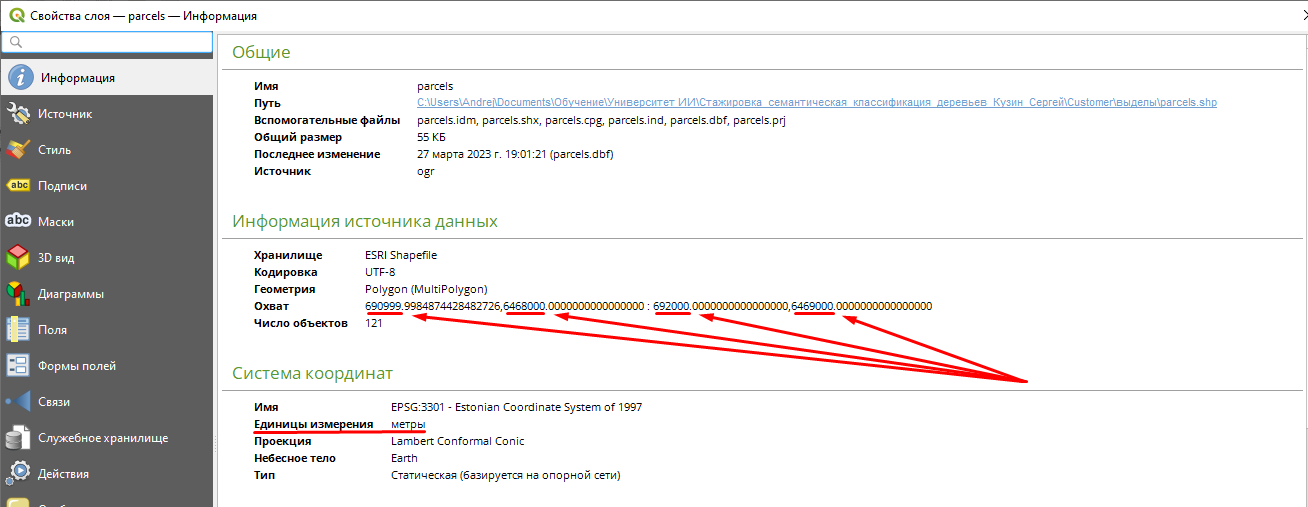


Так как координаты изменяютсся с запада на восток и севера на юг, то крайняя левая точка (северо-запад) будет иметь координаты X-max (6469000 м)  и Y-min (691000 м)

In [8]:
print(round(abs(las.header.maxs[0] - las.header.mins[0]), 1))
print(round(abs(las.header.maxs[1] - las.header.mins[1]), 1))
print(round(abs(las.header.maxs[2] - las.header.mins[2]), 1))

1000.0
1000.0
170.0


**Вывод**. Координаты записаны с размерностью в м в координатах ERSG-3301

### Анализ цветов точек

In [9]:
# Получение информации о цвете
red = las.red
green = las.green
blue = las.blue
nir = las.nir                                                                   # ближний ИК диапазон

In [10]:
red.min(), red.max(), green.min(), green.max(), blue.min(), blue.max(), nir.min(), nir.max(),

(0, 65280, 0, 65280, 0, 62208, 3584, 65280)

**Вывод.** 
- Точка кодирует 4 цвета RGBN. N - ближний ИК диапазон
- Цвета записаны в размерности 2^16 (65280 оттенков RGBN) 

### Анализ классов точек

In [11]:
np.unique(las.classification)

array([ 1,  2,  5,  7, 18], dtype=uint8)

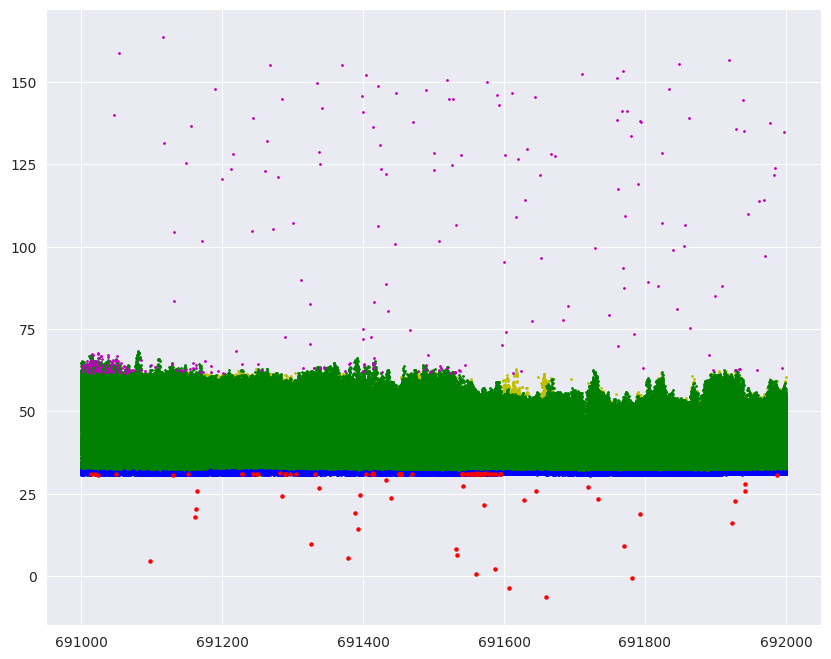

280708 260393 830592 89 296


In [12]:
p1 = las[las.classification == 1]                                               # Точки 1 класса
p2 = las[las.classification == 2]                                               # Точки 2 класса
p5 = las[las.classification == 5]                                               # Точки 5 класса
p7 = las[las.classification == 7]                                               # Точки 7 класса
p18 = las[las.classification == 18]

plt.figure(figsize=(10, 8))
plt.scatter(p1.x, p1.z, s = 1, c = 'y')                                         # план X-Z
plt.scatter(p2.x, p2.z, s = 1, c = 'b')
plt.scatter(p5.x, p5.z, s = 1, c = 'g')
plt.scatter(p7.x, p7.z, s = 5, c = 'r')
plt.scatter(p18.x, p18.z, s = 1, c = 'm')
plt.show()
print(len(p1), len(p2), len(p5), len(p7), len(p18))

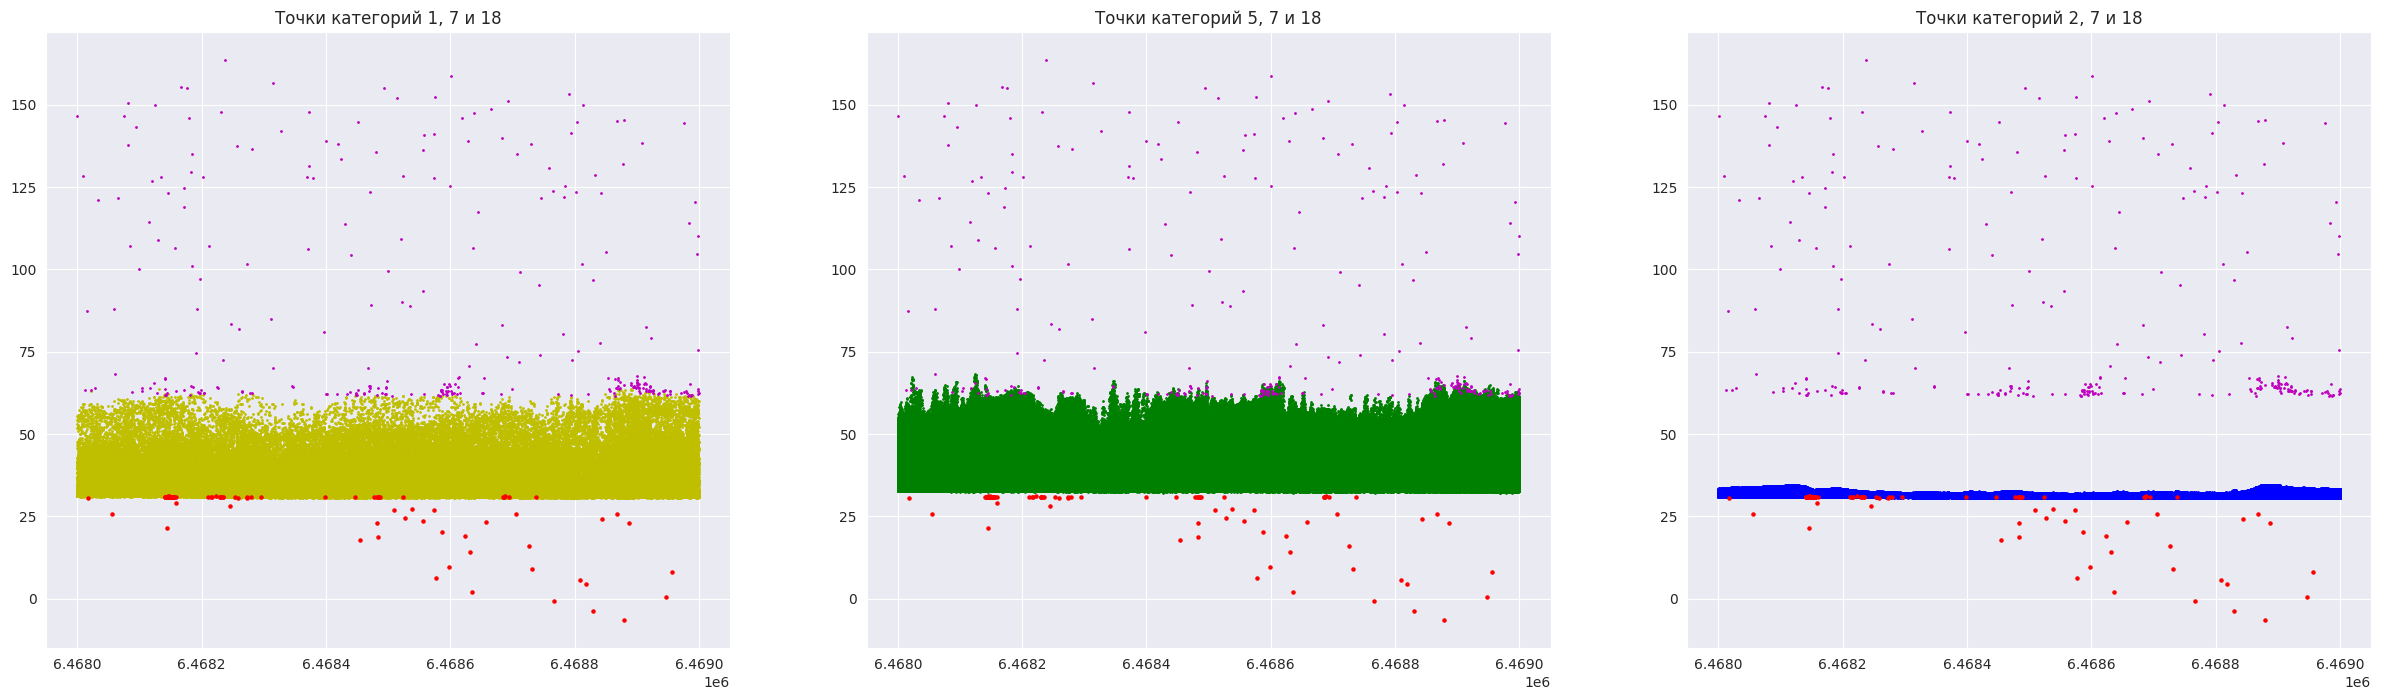

In [13]:
fig = plt.figure(figsize=(30, 8)) 
ax1 = fig.add_subplot(1, 3, 1)                                                  
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.scatter(p1.y, p1.z, s = 1, c = 'y')                                         # план Y-Z
ax1.scatter(p7.y, p7.z, s = 5, c = 'r')
ax1.scatter(p18.y, p18.z, s = 1, c = 'm')
ax1.set_title('Точки категорий 1, 7 и 18')


ax2.scatter(p5.y, p5.z, s = 1, c = 'g')
ax2.scatter(p7.y, p7.z, s = 5, c = 'r')
ax2.scatter(p18.y, p18.z, s = 1, c = 'm')
ax2.set_title('Точки категорий 5, 7 и 18')

ax3.scatter(p2.y, p2.z, s = 1, c = 'b')
ax3.scatter(p7.y, p7.z, s = 5, c = 'r')
ax3.scatter(p18.y, p18.z, s = 1, c = 'm')
ax3.set_title('Точки категорий 2, 7 и 18')

plt.show()

**Выводы.** Категория точек идет в качестве описания данных лазерного сканирования, которого у нас нет. Но обычно точки земли имеют категорию 2, а точки деревьев - 5. 
- В нашем случае. в датасет стоит передать только точки категории 1 и 5, где категория 5 это точно деревья, а категория 1 "похожа" на деревья. Предположительно это точки не классифицированные деревьями ПО лидара. 
- Категории 7 и 18 можно (нужно) удалить, так как в нашей задаче они являються мусором/шумом
- Точки земли (категория 2) также желательно удалит, т.к. они не содержат информации о растительности.

### Удаление точек категории 2, 7 и 18

In [14]:
mask = (las.classification==2)|(las.classification==7)|(las.classification==18) # Маска с точками класса 2, 7 и 18
sum(mask)                                                                       # Количество таких точек

260778

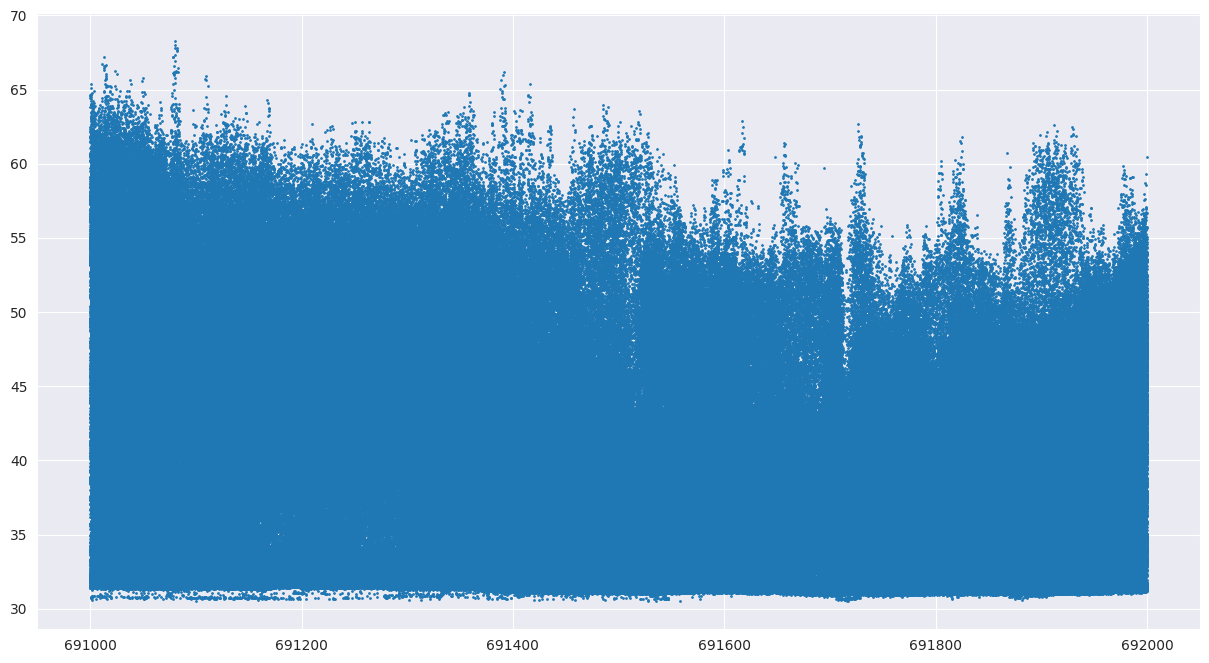

In [15]:
plt.figure(figsize=(15, 8))
plt.scatter(las.x[~mask], las.z[~mask], s = 1)                                  
plt.show()

In [17]:
points = las[~mask]
len(points)                                                                     # количество оставшихся точек 1 и 5 категорий

1111300

Определим получившуюся высоту нового набора точек

In [18]:
min_z = points.z.min()                                                          # уровень "земли" для оставшихся точек
points.z.max() - min_z

37.760000000000005

### Проверяем как выглядит облако точек в 3D

In [20]:
colors = np.vstack((points.red,points.green,points.blue,points.nir)).transpose() / 65280.                     # массив информации о цвете

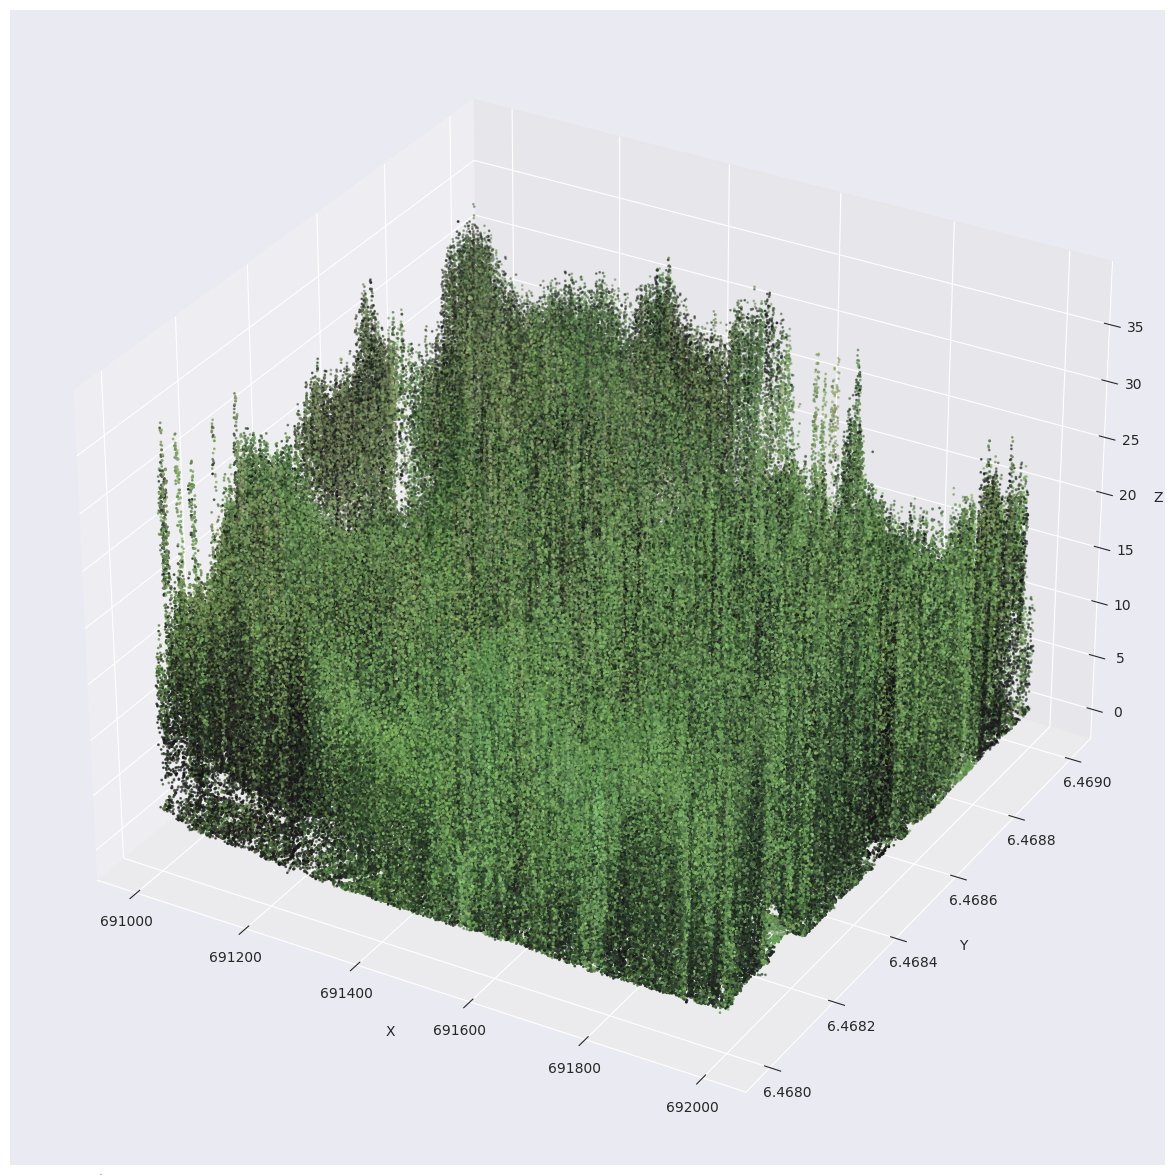

In [21]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points.x, points.y, (points.z - min_z), s=1, c=colors[:,:3])         # (points.z - min_z) - приземляем деревья на уровень земли

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Для более детального осмотра вырежим участок меджу координатами^
- 691400:691600 по X
- 6468400:6468600 по Y

In [22]:
X_invalid = (691400 > points.x) | (691600 < points.x)
Y_invalid = (6468400 > points.y) | (6468600 < points.y)
mask = (X_invalid | Y_invalid)                                                  # здадим маску точек не входящих в заданный квадрат
sum(~mask)                                                                      # количество точек попавших в квадрат

35039

In [23]:
cutout_x = points.x[~mask]
cutout_y = points.y[~mask]
cutout_z = points.z[~mask]- min(points.z[~mask])                                # дополнительно приземляем деревья на уровень земли                                
cutout_col = colors[~mask]

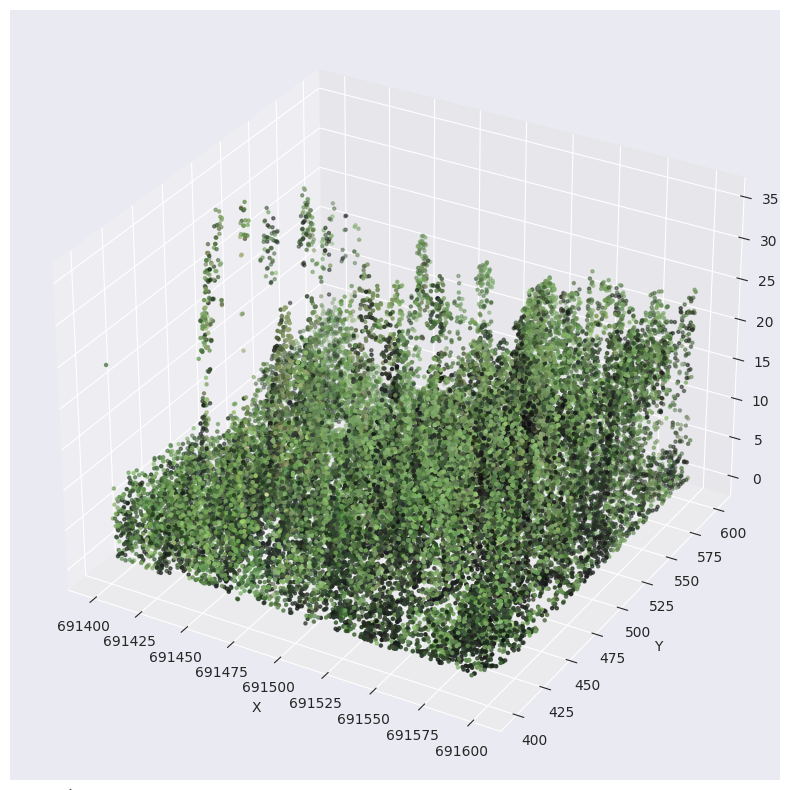

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cutout_x, cutout_y, cutout_z, s=5, c=cutout_col[:,:3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()